In [6]:
library(dplyr)
library(ggplot2)
library(cowplot)

In [2]:
revision_folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/"

In [3]:
### chr19 only, standardised y

In [15]:
std_folder = paste0(revision_folder,"limix_qtl_pipeline_Gtest/Gtest_10MOFA/results_mj/TestOutChr19_Std/")
std_folder_perm = paste0(revision_folder,"limix_qtl_pipeline_Gtest/Gtest_10MOFA/results_mj/TestOutChr19_Std/Perm/")

In [12]:
head(list.files(std_folder))

[1] "19_0_177913.finished"          "19_1000418_1174282.finished"  
[3] "19_10199708_10341962.finished" "19_10334520_10420556.finished"
[5] "19_10416103_10601676.finished" "19_10596796_10755235.finished"

In [16]:
res_filename = paste0(std_folder,"qtl_results_all.txt")
leads_filename = paste0(std_folder,"top_qtl_results_all.txt")
perms_filename = paste0(std_folder_perm,"permutationInformation.txt")

In [8]:
res = read.csv(res_filename, sep="\t")
nrow(res)
head(res,2)

[1] 997544

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,rho,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
ENSG00000251369,19_58064327_T_G,0.0001885812,0.08452111,0.02263364,1.097966e-06,19,58046625,58071231,27598,99,5.14187,1006.831,0.9,19,58064327,G,1,0.2121212,0.0653032
ENSG00000251369,19_58066752_G_A,0.0001885812,0.08452111,0.02263364,1.097966e-06,19,58046625,58071231,27598,99,5.14187,1006.831,0.9,19,58066752,A,1,0.2121212,0.0653032


In [9]:
leads = read.csv(leads_filename, sep="\t")
nrow(leads)
head(leads,2)

[1] 894

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,rho,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id
19_58142436_T_C,0.0081413827,-0.0649779,0.02455408,0.9214486787,19,58082934,58090295,27598,99,1.365833,388.6255,0.7,19,58142436,C,1,0.1363636,0.6878423,ENSG00000083817
19_58011006_C_T,0.0001527829,-0.0551530,0.01456379,0.0002590229,19,57999079,58006048,27598,99,1.931094,126.3703,0.8,19,58011006,T,1,0.4696970,0.8408932,ENSG00000105136


In [17]:
perms = read.csv(perms_filename, sep="\t")
nrow(perms)
perms$feature_id = perms$feature
head(perms,2)

[1] 956698

permutation_0,permutation_1,permutation_2,permutation_3,permutation_4,permutation_5,permutation_6,permutation_7,permutation_8,permutation_9,snp_id,feature,QTL,feature_id
0.3968642,0.1572322,0.6636137,0.6048414,0.2296011,0.4366199,0.8005798,0.2582176,0.4278385,0.4159007,19_226776_C_T,ENSG00000225373,19_226776_C_T-ENSG00000225373,ENSG00000225373
0.5495692,0.8175322,0.5967550,0.3545064,0.4021758,0.5639303,0.9012174,0.1638183,0.1198824,0.4415691,19_240867_A_C,ENSG00000225373,19_240867_A_C-ENSG00000225373,ENSG00000225373


In [18]:
########### all SNP-gene pairs

In [19]:
res2 = inner_join(res,perms, by = c("snp_id","feature_id"))
nrow(res2)
head(res2,2)

[1] 997544

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,...,permutation_2,permutation_3,permutation_4,permutation_5,permutation_6,permutation_7,permutation_8,permutation_9,feature,QTL
ENSG00000251369,19_58064327_T_G,0.0001885812,0.08452111,0.02263364,1.097966e-06,19,58046625,58071231,27598,...,0.184105,0.04573058,0.1638509,0.3021941,0.1431045,0.0580148,0.1010522,0.0380312,ENSG00000251369,19_58064327_T_G-ENSG00000251369
ENSG00000251369,19_58066752_G_A,0.0001885812,0.08452111,0.02263364,1.097966e-06,19,58046625,58071231,27598,...,0.184105,0.04573058,0.1638509,0.3021941,0.1431045,0.0580148,0.1010522,0.0380312,ENSG00000251369,19_58066752_G_A-ENSG00000251369


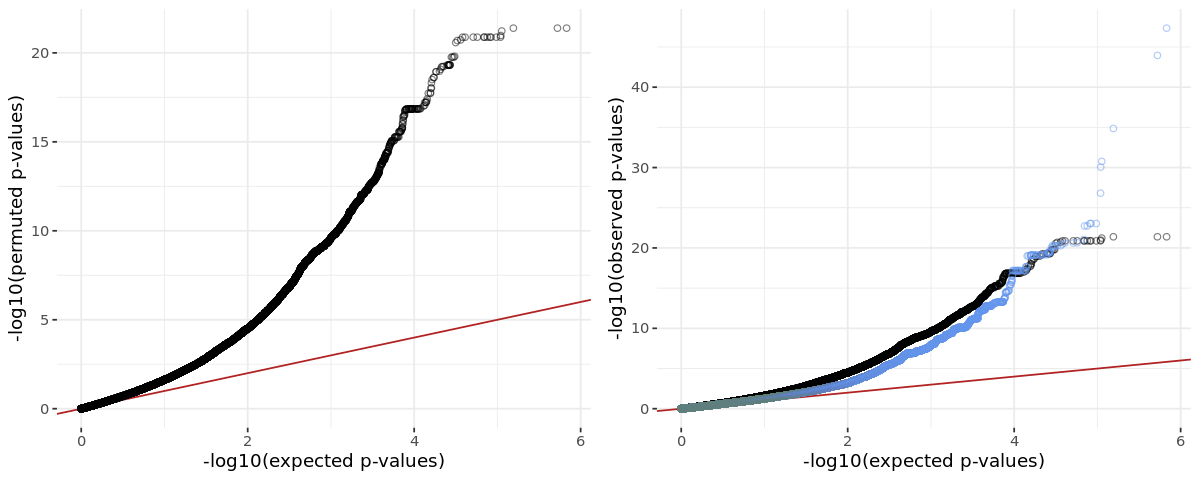

In [20]:
df = res2
df$pv_uniform = runif(dim(df)[1], min = 0, max = 1)
p1 = ggplot(df, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(permutation_1)))) + 
        geom_abline(slope = 1, intercept = 0, col = "firebrick") +
        geom_point(alpha = 0.5, pch = 1) + xlab("-log10(expected p-values)") + ylab("-log10(permuted p-values)") +
        theme_bw() + 
        theme(legend.position="none", panel.border = element_blank())
p2 = ggplot(df) + 
        geom_abline(slope = 1, intercept = 0, col = "firebrick") +
        geom_point(alpha = 0.5, pch = 1, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(permutation_1)))) +
        geom_point(color = "cornflowerblue", alpha = 0.5, pch = 1, 
                   aes(x = sort(-log10(pv_uniform)), y = sort(-log10(p_value)))) + 
        xlab("-log10(expected p-values)") + ylab("-log10(observed p-values)") + 
        theme_bw() + 
        theme(legend.position="none", panel.border = element_blank())
options(repr.plot.width = 10, repr.plot.height = 4) 
plot_grid(p1, p2, ncol = 2)

In [21]:
#### one SNP per gene (at random)

In [22]:
res3 = res2[sample(nrow(res2)),]
res3 = res3[-which(duplicated(res3$feature_id)),]

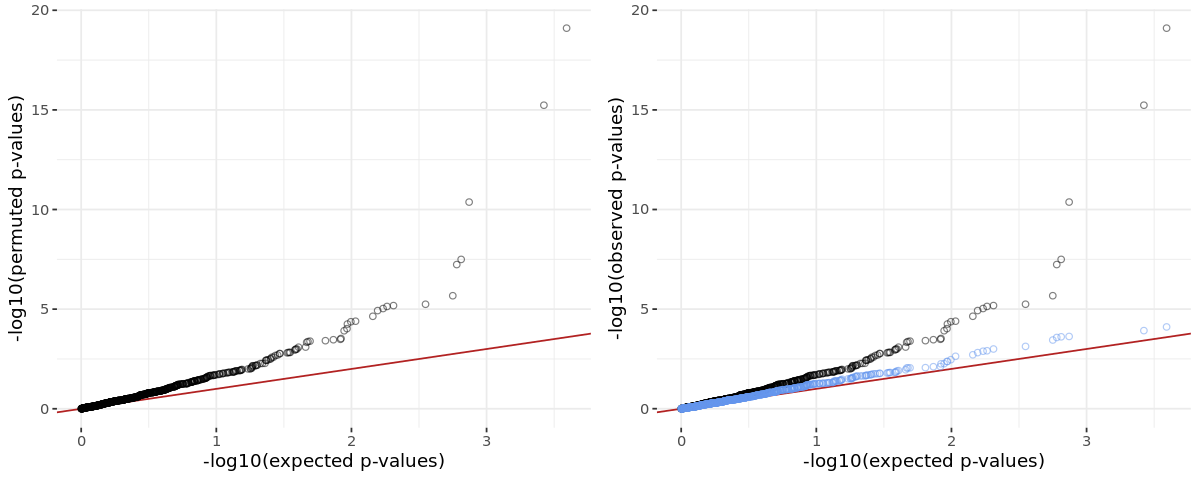

In [27]:
df = res3
df$pv_uniform = runif(dim(df)[1], min = 0, max = 1)
p1 = ggplot(df, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(permutation_0)))) + 
        geom_abline(slope = 1, intercept = 0, col = "firebrick") +
        geom_point(alpha = 0.5, pch = 1) + xlab("-log10(expected p-values)") + ylab("-log10(permuted p-values)") +
        theme_bw() + 
        theme(legend.position="none", panel.border = element_blank())
p2 = ggplot(df) + 
        geom_abline(slope = 1, intercept = 0, col = "firebrick") +
        geom_point(alpha = 0.5, pch = 1, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(permutation_0)))) +
        geom_point(color = "cornflowerblue", alpha = 0.5, pch = 1, 
                   aes(x = sort(-log10(pv_uniform)), y = sort(-log10(p_value)))) + 
        xlab("-log10(expected p-values)") + ylab("-log10(observed p-values)") + 
        theme_bw() + 
        theme(legend.position="none", panel.border = element_blank())
options(repr.plot.width = 10, repr.plot.height = 4) 
plot_grid(p1, p2, ncol = 2)

In [24]:
#### top SNP per gene (min p-value)

In [25]:
leads2 = inner_join(leads,perms, by = c("snp_id","feature_id"))
nrow(leads2)
head(leads2,2)

[1] 894

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,...,permutation_2,permutation_3,permutation_4,permutation_5,permutation_6,permutation_7,permutation_8,permutation_9,feature,QTL
19_58142436_T_C,0.0081413827,-0.0649779,0.02455408,0.9214486787,19,58082934,58090295,27598,99,...,0.2159589,0.005258697,0.08361423,0.1174989,0.1347446,0.0106558,0.91106858,0.1333964,ENSG00000083817,19_58142436_T_C-ENSG00000083817
19_58011006_C_T,0.0001527829,-0.0551530,0.01456379,0.0002590229,19,57999079,58006048,27598,99,...,0.7034264,0.462672742,0.56256835,0.1390157,0.3049752,0.9720766,0.03127937,0.5624507,ENSG00000105136,19_58011006_C_T-ENSG00000105136


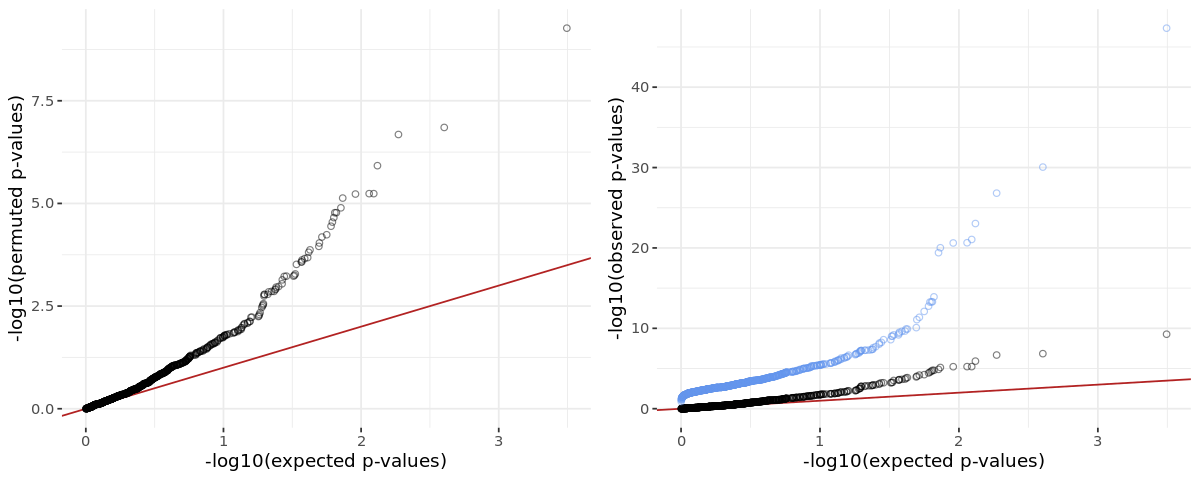

In [26]:
df = leads2
df$pv_uniform = runif(dim(df)[1], min = 0, max = 1)
p1 = ggplot(df, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(permutation_1)))) + 
        geom_abline(slope = 1, intercept = 0, col = "firebrick") +
        geom_point(alpha = 0.5, pch = 1) + xlab("-log10(expected p-values)") + ylab("-log10(permuted p-values)") +
        theme_bw() + 
        theme(legend.position="none", panel.border = element_blank())
p2 = ggplot(df) + 
        geom_abline(slope = 1, intercept = 0, col = "firebrick") +
        geom_point(alpha = 0.5, pch = 1, aes(x = sort(-log10(pv_uniform)), y = sort(-log10(permutation_1)))) +
        geom_point(color = "cornflowerblue", alpha = 0.5, pch = 1, 
                   aes(x = sort(-log10(pv_uniform)), y = sort(-log10(p_value)))) + 
        xlab("-log10(expected p-values)") + ylab("-log10(observed p-values)") + 
        theme_bw() + 
        theme(legend.position="none", panel.border = element_blank())
options(repr.plot.width = 10, repr.plot.height = 4) 
plot_grid(p1, p2, ncol = 2)